## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
import pywt

## Reading Input Image

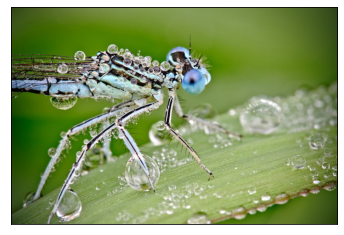

In [2]:
def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    '''
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        iio.imwrite(name, img)
    plt.show()
    
img = iio.imread('q1.jpg')
show_image(img)

## Drawing Histograms

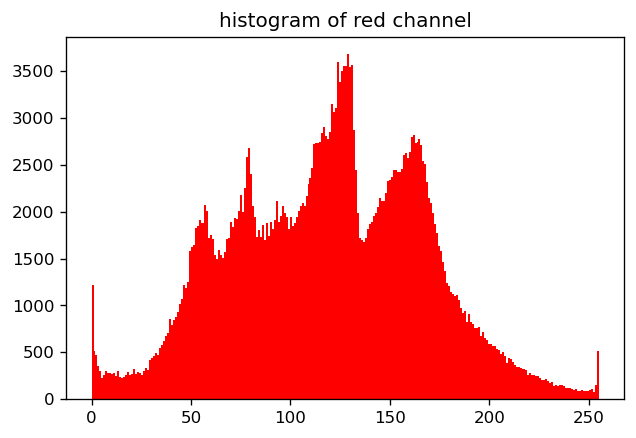

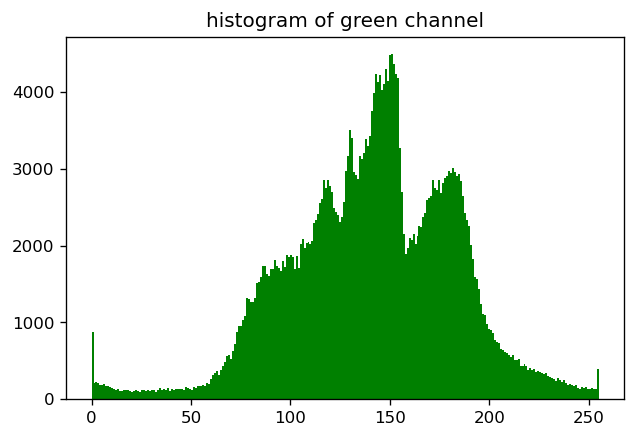

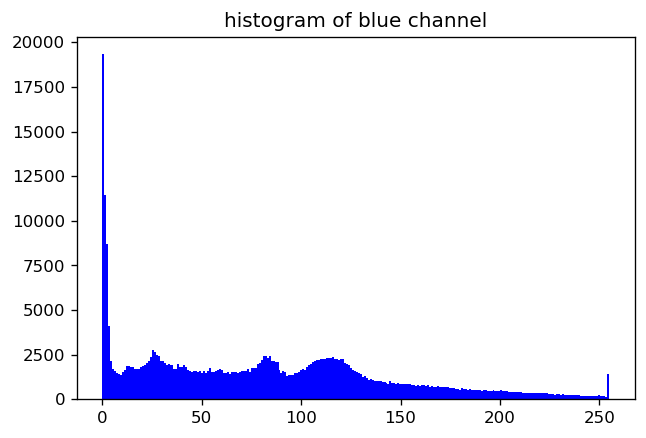

In [6]:
r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

def hist(img, title='', name='', color='blue'):
    '''
    draw histogram of an image
    '''
    h = np.histogram(img.flatten(), bins=256)
    plt.figure(dpi=120)
    plt.hist(img.flatten(), bins=256, color=color)
    plt.title(title)
    plt.savefig(name)
    plt.show()
    return h

hist_r = hist(r, 'histogram of red channel', name='hist_r.jpg', color='red')
hist_g = hist(g, 'histogram of green channel', name='hist_g.jpg', color='green')
hist_b = hist(b, 'histogram of blue channel', name='hist_b.jpg', color='blue')

## Quantization

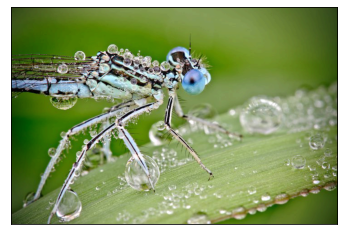

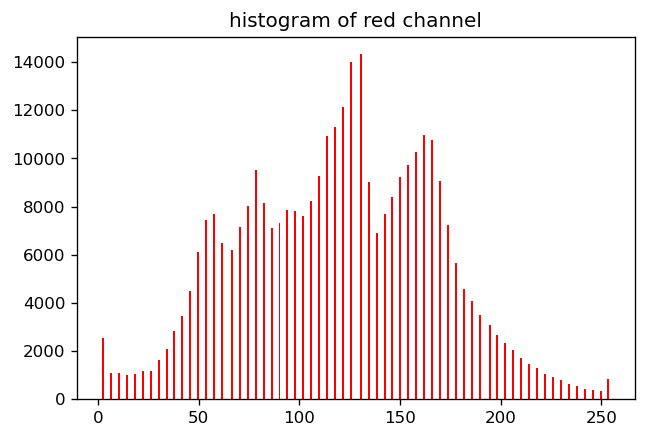

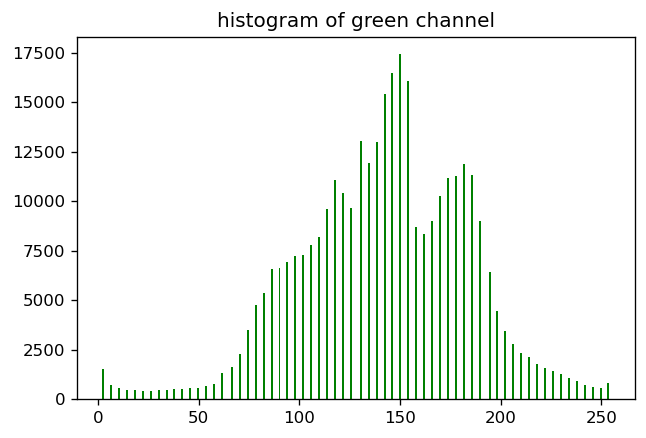

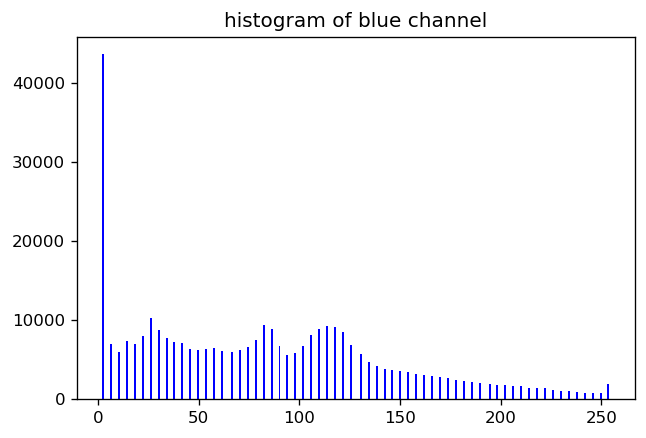

In [28]:
def quantize(img, qval):
    '''
    a function for quantize image with quantization value equals qval
    '''
    n = 256//qval # number of sections in quantization
    img = img.copy()
    for i in range(n):
        img[(img<qval*(i+1))&(img>=qval*i)] = np.round(qval*(i+0.5))
    return img

qval = 4
rnew = quantize(r, qval)
gnew = quantize(g, qval)
bnew = quantize(b, qval)
clustered = np.dstack((rnew, gnew, bnew))
show_image(clustered, save=True, name='clustered.jpg')

hist_r_clus = hist(rnew, 'histogram of red channel', name='hist_r_clus.jpg', color='red')
hist_g_clus = hist(gnew, 'histogram of green channel', name='hist_g_clus.jpg', color='green')
hist_b_clus = hist(bnew, 'histogram of blue channel', name='hist_b_clus.jpg', color='blue')